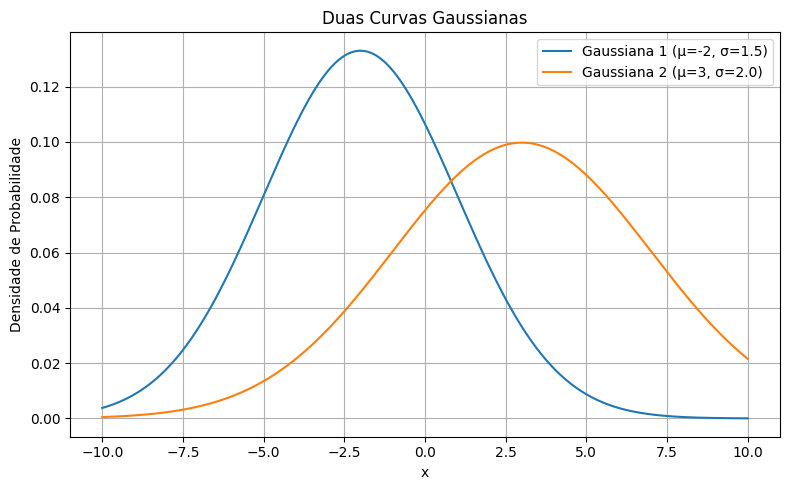

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Eixo x
x = np.linspace(-10, 10, 400)

# Parâmetros das gaussianas
mu1, sigma1 = -2, 3   # média e desvio padrão da 1ª
mu2, sigma2 = 3, 4    # média e desvio padrão da 2ª

# Densidades de probabilidade
g1 = (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)
g2 = (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, g1, label='Gaussiana 1 (μ=-2, σ=1.5)')
plt.plot(x, g2, label='Gaussiana 2 (μ=3, σ=2.0)')
plt.title('Duas Curvas Gaussianas')
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('duas_gaussianas.png')   # Salva o arquivo
plt.show()

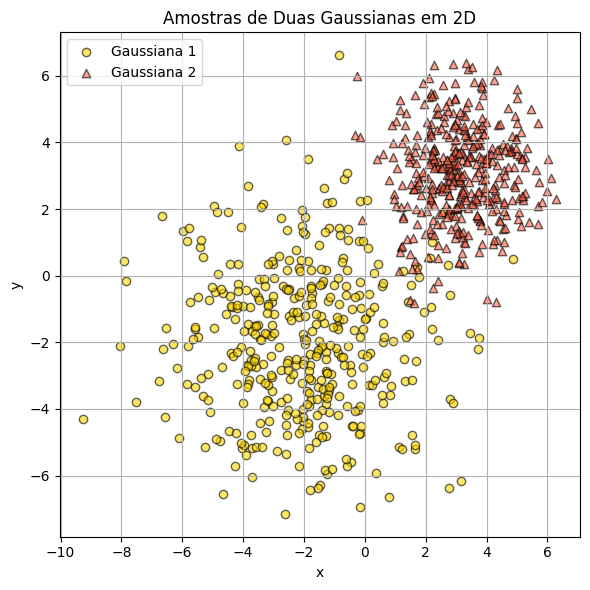

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Gerar amostras de 2 Gaussianas
# ---------------------------
np.random.seed(42)                                # reprodutibilidade

mean1 = [-2, -2]                                 # média da 1ª gaussiana
cov1  = [[5, 0],                             # matriz de covariância
         [0, 5]]

mean2 = [3, 3]                                   # média da 2ª gaussiana
cov2  = [[1.7, 0],
         [0, 1.7]]

n_samples = 400
samples1 = np.random.multivariate_normal(mean1, cov1, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# ---------------------------
# Plotar pontos
# ---------------------------
plt.figure(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1],
            color="gold", edgecolor="k", alpha=0.6, label="Gaussiana 1")
plt.scatter(samples2[:, 0], samples2[:, 1],
            color="tomato", marker="^", edgecolor="k", alpha=0.6, label="Gaussiana 2")

plt.title("Amostras de Duas Gaussianas em 2D")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Salvar (opcional)
plt.savefig("duas_gaussianas_2D.png", dpi=150)
plt.show()


In [87]:
import math

def distancia_euclidiana(p1, p2):
    distancia_quadrada = 0
    for i in range(len(p1)):
        distancia_quadrada += (p1[i] - p2[i])**2
    return math.sqrt(distancia_quadrada)

def my_knn(X_train, y_train, X_test, y_test, k):
    y_predicted = []

    for j in range(len(X_test)):
        distancias = []
        for i in range(len(X_train)):
            dist = distancia_euclidiana(X_test[j], X_train[i])
            distancias.append((dist, y_train[i]))
        
        distancias.sort(key = lambda x: x[0])
        vizinhos = distancias[:k]

        labels = [v[1] for v in vizinhos]
        predict = max(set(labels), key=labels.count)
        y_predicted.append(predict)

    return y_predicted

## Classificador KNN para Gaussianas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# -------- 1) Gerar dados ----------
np.random.seed(42)
mean1, cov1 = [1, 1], [[2.0, 0.3], [0.3, 1.0]]
mean2, cov2 = [1.5, 1.5],   [[1.5, -0.4], [-0.4, 1.5]]
n_samples = 400

X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
X2 = np.random.multivariate_normal(mean2, cov2, n_samples)
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))   # rótulos

# -------- 2) Treino x teste (30 % teste) ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42)

# -------- 3) Modelo de classificação ----------
y_predicted = my_knn(X_train, y_train, X_test, y_test, 5)
wrong = 0
for i in range(len(y_test)):
    if y_predicted[i] != y_test[i]:
        wrong += 1
acc_my_knn = (len(y_predicted) - wrong) / len(y_predicted)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predicted_sk = knn.predict(X_test)
acc_sklearn = knn.score(X_test, y_test)

# -------- 4) Plot ----------
plt.figure(figsize=(6, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],
            color="gold", edgecolor="k", alpha=0.30, label="Gaussiana 1 (treino)")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1],
            color="tomato", marker="^", edgecolor="k", alpha=0.30, label="Gaussiana 2 (treino)")

plt.scatter(X_train[:, 0], X_train[:, 1],
            color="lime", marker="x", s=60, label="teste (30 %)")

plt.title(f"teste 30 % – Acurácia logística = {acc:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("gaussianas_split_treino.png", dpi=150)
plt.show()

In [31]:
acc_my_knn


0.6375

## Classificador KNN UCI

In [ ]:
! pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_landsat_satellite = fetch_ucirepo(id=146) 

# data (as pandas dataframes) 
X = statlog_landsat_satellite.data.features 
y = statlog_landsat_satellite.data.targets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42)

X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
y_train = y_train.squeeze().tolist()
y_test = y_test.squeeze().tolist()

y_predicted = my_knn(X_train, y_train, X_test, y_test, 5)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predicted_sk = knn.predict(X_test)
acc_sklearn = knn.score(X_test, y_test)


In [89]:
wrong = 0
for i in range(len(y_test)):
    if y_predicted[i] != y_test[i]:
        wrong += 1
acc_my_knn = (len(y_predicted) - wrong) / len(y_predicted)
print(f"Acurácia do KNN: {acc_my_knn:.2f}")
print(f"Acurácia do KNN: {acc_sklearn:.2f}")

Acurácia do KNN: 0.91
Acurácia do KNN: 0.91
